In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [66]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


as we see all columns seems to be good but the value for insulin from 75% quartile and max is huge so it may be outlier and there is alot of zeros in it

In [69]:
insulin_median = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, insulin_median)

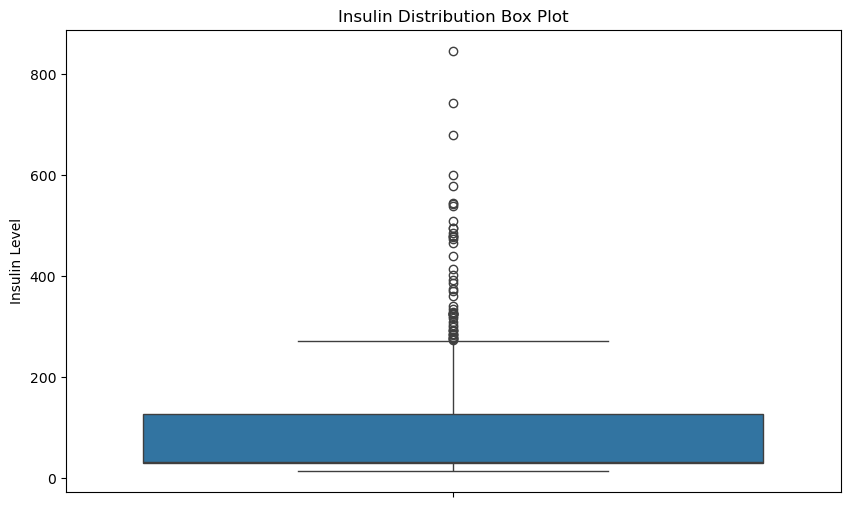

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Insulin'])
plt.title('Insulin Distribution Box Plot')
plt.ylabel('Insulin Level')
plt.show()

as we see there is outliers in insulin column which we can cap

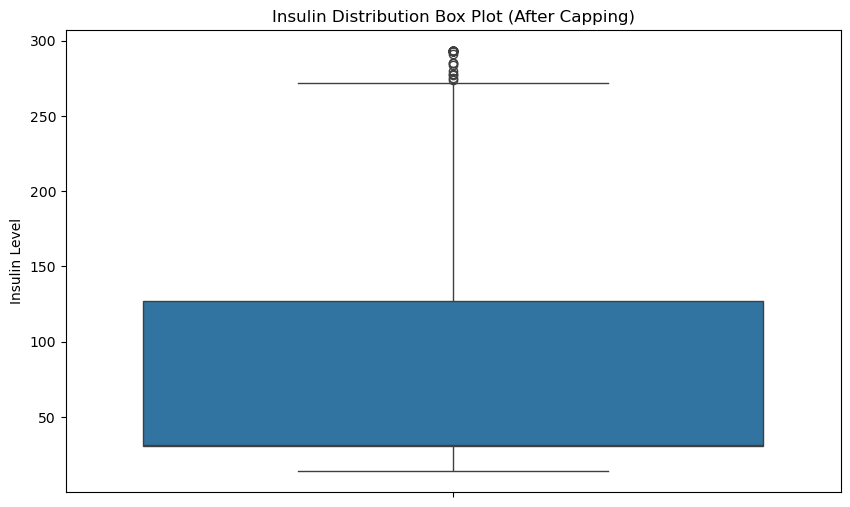

In [71]:
insulin_95th = df['Insulin'].quantile(0.95)
df['Insulin'] = df['Insulin'].clip(upper=insulin_95th)

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Insulin'])
plt.title('Insulin Distribution Box Plot (After Capping)')
plt.ylabel('Insulin Level')
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


<AxesSubplot: xlabel='Outcome'>

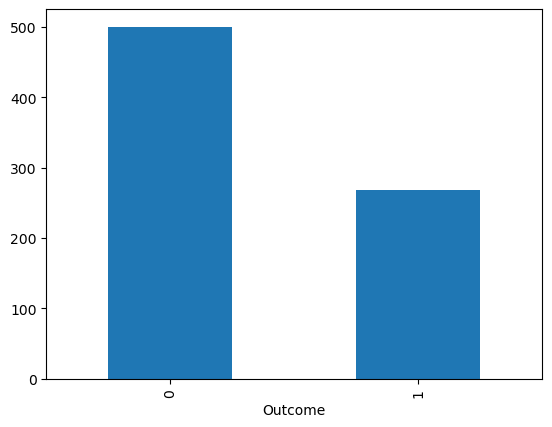

In [72]:
print(df['Outcome'].value_counts())
df['Outcome'].value_counts().plot(kind='bar')

let's see the correlation matrix for all columns and the outcome what will affect it more

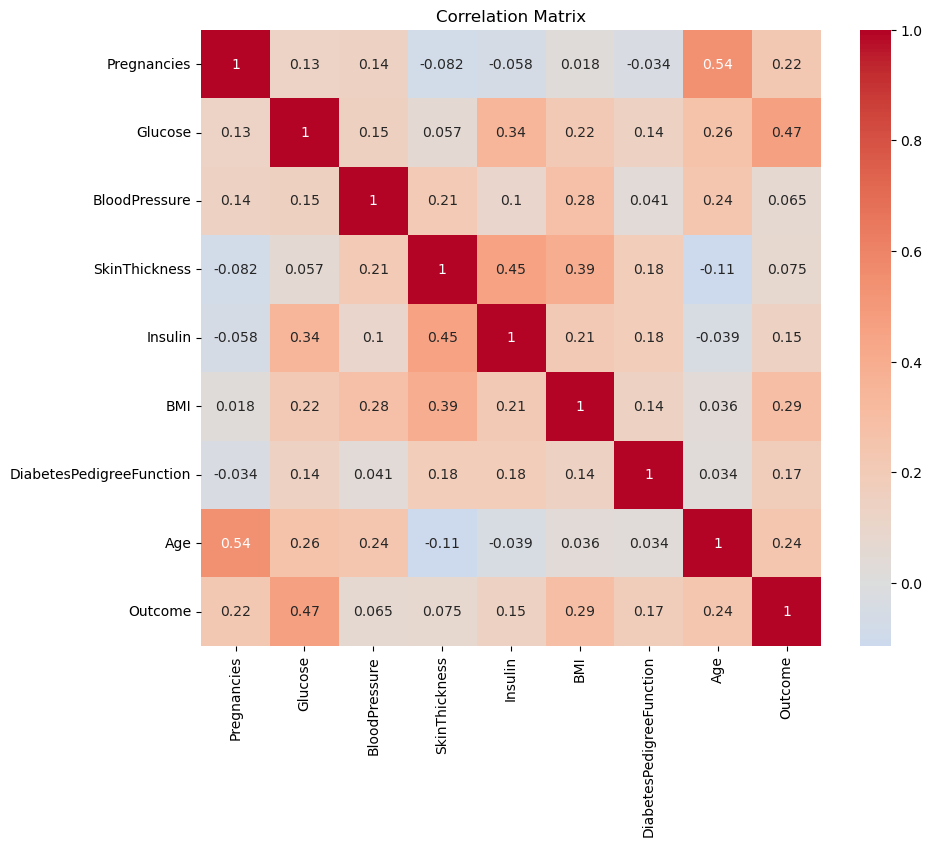

In [73]:
# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Glucose vs. Outcome → Correlation is 0.47, which is moderately strong and positive.
This means higher glucose levels are fairly strongly associated with a higher likelihood of a positive outcome (likely diabetes in this dataset).

BMI vs. Outcome → Correlation is 0.29, which is weaker than glucose but still positive.
This suggests BMI does play a role, but not as strongly as glucose. It has some predictive value but is not the dominant factor.